<a href="https://colab.research.google.com/github/ZuckermanLab/CodingClass2025/blob/main/Day2_PSI_Coding_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing the Packages
# you'll need for today

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("ggplot")

In [40]:
# Installing the Dataset Package
# take a second to look at the CPTAC websites:
# https://gdc.cancer.gov/about-gdc/contributed-genomic-data-cancer-research/clinical-proteomic-tumor-analysis-consortium-cptac
# https://paynelab.github.io/cptac/tutorial01_data_intro.html

! pip install cptac

In [6]:
import cptac

In [7]:
# what is in the cptac dataset?
cptac.get_source_options()

Cancer
Source     Datatype                                                              
bcm        CNV                  [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
           circular_RNA               [ccrcc, gbm, lscc, luad, pdac, ucec, hnscc]
           miRNA                [coad, ccrcc, gbm, lscc, luad, pdac, ucec, brc...
           phosphoproteomics    [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
           proteomics           [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
           transcriptomics      [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
broad      transcriptomics      [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
harmonized ancestry_prediction                                      [all_cancers]
           somatic_mutation                                         [all_cancers]
mssm       clinical                                                 [all_cancers]
umich      acetylproteomics                         [gbm, lscc, luad, ucec, brca]
           phosphoproteomics    [coad, ccrcc, gbm, lscc, luad, pdac, ucec, brc...
           proteomics           [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
washu      CNV                  [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
           cibersort            [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...
           hla_typing                                               [all_cancers]
           mature_miRNA               [ccrcc, gbm, lscc, luad, pdac, ucec, hnscc]
           precursor_miRNA            [ccrcc, gbm, lscc, luad, pdac, ucec, hnscc]
           somatic_mutation        [coad, gbm, ov, lscc, luad, pdac, ucec, hnscc]
           total_miRNA                [ccrcc, gbm, lscc, luad, pdac, ucec, hnscc]
           transcriptomics      [coad, ccrcc, gbm, ov, pdac, luad, ucec, brca,...
           tumor_purity                                             [all_cancers]
           xcell                [coad, ccrcc, gbm, ov, lscc, luad, pdac, ucec,...

In [8]:
# what do the cancer abbreviations stand for?
cptac.get_cancer_info()

{'brca': 'Breast invasive carcinoma',
 'ccrcc': 'Clear cell renal cell carcinoma',
 'coad': 'Colon adenocarcinoma',
 'gbm': 'Glioblastoma multiforme',
 'hnscc': 'Head and Neck squamous cell carcinoma',
 'lscc': 'Lung squamous cell carcinoma',
 'luad': 'Lung adenocarcinoma',
 'ov': 'Ovarian serous cystadenocarcinoma',
 'pda': 'Pancreatic ductal adenocarcinoma',
 'pdac': 'Pancreatic ductal adenocarcinoma',
 'ucec': 'Uterine Corpus Endometrial Carcinoma'}

In [9]:
# If we focused on a single cancer type, what data can be collected?
bc = cptac.Brca() # for breast cancer...
bc.list_data_sources()

,Data type,Available sources
0,CNV,"[bcm, washu]"
1,miRNA,[bcm]
2,phosphoproteomics,"[bcm, umich]"
3,proteomics,"[bcm, umich]"
4,transcriptomics,"[bcm, broad, washu]"
5,ancestry_prediction,[harmonized]
6,somatic_mutation,"[harmonized, washu]"
7,clinical,[mssm]
8,follow-up,[mssm]
9,medical_history,[mssm]


In [10]:
# getting help from the package itself
help(bc) # <-- we've stored breast cancer data as bc ("bc = cptac.Brca()")

Help on Brca in module cptac.cancers.brca object:

class Brca(cptac.cancers.cancer.Cancer)
 |  Brca(no_internet=False)
 |  
 |  Manages BRCA (Breast Cancer) data from various sources.
 |  
 |  This class extends the base Cancer class and initializes the BRCA data from 
 |  a variety of sources including BCM, Broad Institute, MSSM, University of Michigan, 
 |  Washington University, and a Harmonized dataset. 
 |  
 |  Attributes:
 |      _sources (dict): A dictionary holding data from different sources.
 |  
 |  Method resolution order:
 |      Brca
 |      cptac.cancers.cancer.Cancer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, no_internet=False)
 |      Initializes the Brca object.
 |      
 |      Args:
 |          no_internet (bool): If True, the object will not attempt to download data from the internet. 
 |                              Default is False.
 |      
 |      Raises:
 |          ValueError: If the 'no_internet' argument is not of boolea

In [48]:
# try and do something simple
bc.get_cancer_type()

'brca'

In [12]:
# bc = cptac.Brca() <-- we just used this command
# get_transcriptomics(self, source: str = None, tissue_type: str = 'both', imputed: bool = False) -> pandas.core.frame.DataFrame
#      Get the transcriptomics dataframe from the specified data source.

bc.get_transcriptomics('bcm') # what is this doing? # hint: look at table (try switching institution)

Name,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,hsa-mir-1253,hsa-mir-423
Database_ID,ENSG00000121410.12,ENSG00000268895.6,ENSG00000148584.15,ENSG00000175899.15,ENSG00000245105.4,ENSG00000166535.20,ENSG00000256661.1,ENSG00000256904.1,ENSG00000256069.7,ENSG00000184389.9,...,ENSG00000198455.4,ENSG00000070476.15,ENSG00000203995.10,ENSG00000232242.2,ENSG00000162378.13,ENSG00000159840.16,ENSG00000274572.1,ENSG00000074755.15,ENSG00000272920.1,ENSG00000266919.3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01BR001,3.51,8.04,0.00,12.93,5.01,4.88,0.0,0.0,3.13,0.00,...,9.02,8.88,7.07,0.0,9.86,10.63,0.0,10.05,0.0,0.0
01BR008,2.84,8.24,2.50,13.02,5.67,10.10,0.0,0.0,0.00,0.00,...,7.93,8.84,8.60,0.0,8.44,11.36,0.0,10.20,0.0,0.0
01BR009,4.85,8.11,0.00,13.68,5.87,9.50,0.0,0.0,3.11,0.00,...,7.53,8.85,3.64,0.0,8.90,10.58,0.0,10.54,0.0,0.0
01BR010,4.24,7.96,0.00,12.64,4.82,5.03,0.0,0.0,1.33,0.00,...,8.53,8.31,8.28,0.0,9.28,12.40,0.0,10.42,0.0,0.0
01BR015,3.89,7.56,1.58,13.55,5.32,3.31,0.0,0.0,2.99,0.00,...,9.17,9.05,5.08,0.0,10.13,10.44,0.0,10.46,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21BR002,0.00,7.86,0.00,13.96,6.51,1.12,0.0,0.0,0.00,1.74,...,7.40,9.79,5.47,0.0,8.97,11.72,0.0,10.18,0.0,0.0
21BR010,3.50,6.83,1.43,14.57,6.76,0.00,0.0,0.0,3.49,0.00,...,10.31,9.14,4.63,0.0,11.22,8.95,0.0,10.19,0.0,0.0


In [13]:
# write into a variable
transcriptomics = bc.get_transcriptomics('bcm')

In [14]:
print(type(transcriptomics))

<class 'pandas.core.frame.DataFrame'>


In [15]:
transcriptomics["A1BG"].head() # try adding a value in the parenthesis and replacing head with tail

Database_ID,ENSG00000121410.12
Patient_ID,
01BR001,3.51
01BR008,2.84
01BR009,4.85
01BR010,4.24
01BR015,3.89


In [16]:
print(np.array(transcriptomics.columns)[:30])
# what does this look like to you?

[('A1BG', 'ENSG00000121410.12') ('A1BG-AS1', 'ENSG00000268895.6')
 ('A1CF', 'ENSG00000148584.15') ('A2M', 'ENSG00000175899.15')
 ('A2M-AS1', 'ENSG00000245105.4') ('A2ML1', 'ENSG00000166535.20')
 ('A2ML1-AS1', 'ENSG00000256661.1') ('A2ML1-AS2', 'ENSG00000256904.1')
 ('A2MP1', 'ENSG00000256069.7') ('A3GALT2', 'ENSG00000184389.9')
 ('A4GALT', 'ENSG00000128274.17') ('A4GNT', 'ENSG00000118017.4')
 ('AAAS', 'ENSG00000094914.14') ('AACS', 'ENSG00000081760.17')
 ('AACSP1', 'ENSG00000250420.8') ('AADAC', 'ENSG00000114771.14')
 ('AADACL2', 'ENSG00000197953.6') ('AADACL2-AS1', 'ENSG00000242908.6')
 ('AADACL3', 'ENSG00000188984.12') ('AADACL4', 'ENSG00000204518.2')
 ('AADACP1', 'ENSG00000240602.7') ('AADAT', 'ENSG00000109576.14')
 ('AAGAB', 'ENSG00000103591.13') ('AAK1', 'ENSG00000115977.19')
 ('AAMDC', 'ENSG00000087884.14') ('AAMP', 'ENSG00000127837.9')
 ('AANAT', 'ENSG00000129673.9') ('AAR2', 'ENSG00000131043.12')
 ('AARD', 'ENSG00000205002.4') ('AARS1', 'ENSG00000090861.16')]


In [50]:
transcriptomics["A1BG"].keys()

Index(['ENSG00000121410.12'], dtype='object', name='Database_ID')

In [18]:
# Making a subset of data from cptac
genes = ["A1BG", "A1CF"]
subset_data = transcriptomics.loc[:, genes].head(5).dropna()

In [19]:
print(type(subset_data))

<class 'pandas.core.frame.DataFrame'>


In [20]:
subset_data

Name,A1BG,A1CF
Database_ID,ENSG00000121410.12,ENSG00000148584.15
Patient_ID,,
01BR001,3.51,0.00
01BR008,2.84,2.50
01BR009,4.85,0.00
01BR010,4.24,0.00
01BR015,3.89,1.58


In [ ]:
## Challenge 0: ##
# What kinds of scientific questions might we ask ourselves about this data set so far?
# Hint: This is how we conduct an exploratory data analysis!

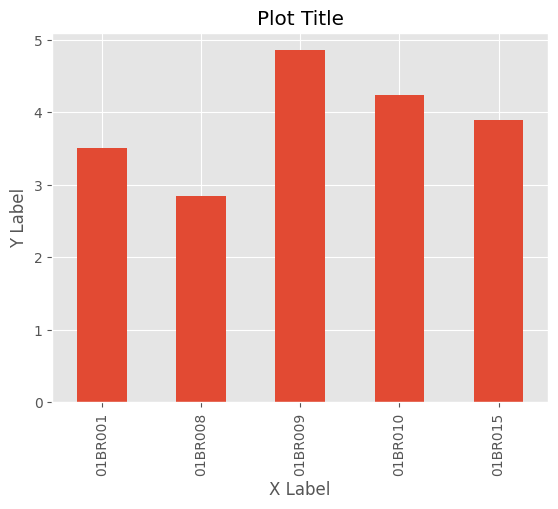

In [62]:
## Bar Plots ##
# Plot directly with pandas
plot_data = transcriptomics.loc[:, ("A1BG", "ENSG00000121410.12")].head(5) # storing as subset of pandas dataframe
plot_data.plot(kind="bar", xlabel='X Label', ylabel='Y Label', title='Plot Title') # plotting commands
plt.show()

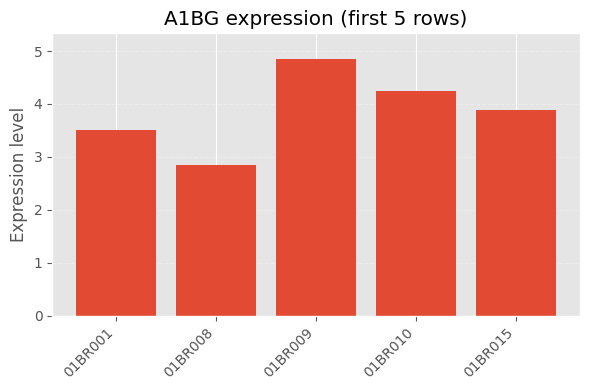

In [59]:
## Bar Plots ##
# Plot with MatPlotLib

# 1. Grab the data
plot_data = transcriptomics.loc[:, ("A1BG", "ENSG00000121410.12")].head(5) # what are these rows?

# 2. Build the figure/axes
fig, ax = plt.subplots(figsize=(6, 4))

# 3. Draw the bars
ax.bar(
    x=range(len(plot_data)),          # numeric x-positions (0, 1, 2, 3, 4)
    height=plot_data.values,          # bar heights
    width=0.8,                        # bar width
)

# 4. Aesthetics
ax.set_title("A1BG expression (first 5 rows)") # since ###.head(5)
ax.set_ylabel("Expression level")     # or whatever units you have
ax.set_xticks(range(len(plot_data)))
ax.set_xticklabels(plot_data.index, rotation=45, ha="right")

# Optional
ax.margins(y=0.1)                     # a little vertical breathing room
ax.spines[["top", "right"]].set_visible(True)
ax.grid(axis="y", linestyle="--", alpha=0.3)

# 5. Render, also optional
plt.tight_layout()
plt.show()


In [63]:
## Challenge 1: ##
# Try plotting to gene expression levels together

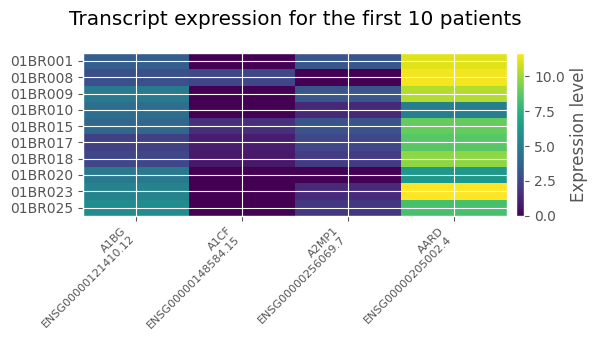

In [56]:
#### Heatmaps #####
# Why might a heatmap be useful?
# Why might it be more helpful than a barplot?

# 1. grab the first 10 patient IDs
patient_ids = transcriptomics.index[:10]          # rows 0-9

# 2. the (gene, transcript_ID) pairs we want
cols = [
    ("A1BG",     "ENSG00000121410.12"),
    ("A1CF",     "ENSG00000148584.15"),
    ("A2MP1",    "ENSG00000256069.7"),
    ("AARD",    "ENSG00000205002.4")
]
# try adding more!

# 3. build a 10×5 NumPy array of expression values
data = np.array(
    [[transcriptomics.loc[pid, col] for col in cols]  # one row per patient
     for pid in patient_ids],
    dtype=float
)

# 4. draw the heat-map
fig, ax = plt.subplots(figsize=(6, 3.5))
im = ax.imshow(data, cmap="viridis", aspect="auto") # try changing the cmap to "inferno"

# x-axis: gene + transcript labels
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels([f"{g}\n{t}" for g, t in cols],
                   rotation=45, ha="right", fontsize=8)

# y-axis: patient IDs
ax.set_yticks(np.arange(len(patient_ids)))
ax.set_yticklabels(patient_ids)

# colour bar
cbar = fig.colorbar(im, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("Expression level")

plt.title("Transcript expression for the first 10 patients", pad=20)
plt.tight_layout()
plt.show()

# note that heatmaps are not perfect plots, comment out specific cols and see how color bar changes

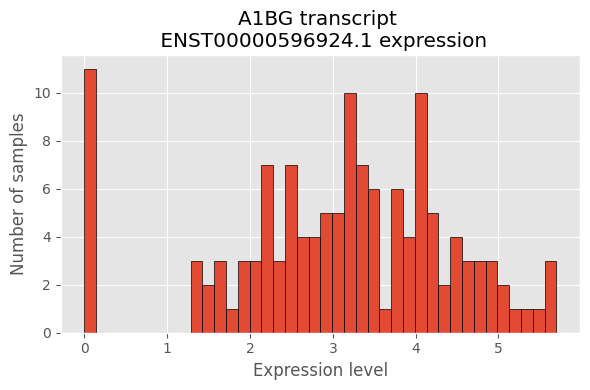

In [24]:
plot_data = transcriptomics.loc[:, ("A1BG", "ENSG00000121410.12")] # <-- we already did this, just a reminde

values = plot_data.dropna().to_numpy(dtype=float) # using all patient data not just the first 5

plt.figure(figsize=(6,4))
plt.hist(values, bins=40, edgecolor="black")   # "auto" picks a sensible bin count, try typing a number
plt.xlabel("Expression level")
plt.ylabel("Number of samples")
plt.title("A1BG transcript \n ENST00000596924.1 expression")
plt.tight_layout()
plt.show()

In [38]:
## Challenge 2: ###
# Try plotting two histograms together!

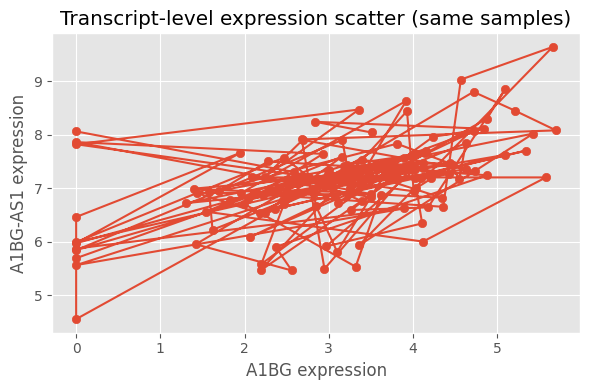

In [39]:
# now lets see if theres a correlation

# 1. Grab each transcript column (MultiIndex style: (gene, transcript_ID))
x = transcriptomics.loc[:, ("A1BG", "ENSG00000121410.12")]
y = transcriptomics.loc[:, ("A1BG-AS1", "ENSG00000268895.6")]

# 2. Keep only the samples that have a value for BOTH transcripts
xy = pd.concat([x, y], axis=1, keys=["A1BG", "A1BG-AS1"]).dropna()

# 3. Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(xy["A1BG"], xy["A1BG-AS1"])
# plt.plot(xy["A1BG"], xy["A1BG-AS1"]) # uncomment this to see how plt.scatter and plt.plot differ
plt.xlabel("A1BG expression")
plt.ylabel("A1BG-AS1 expression")
plt.title("Transcript-level expression scatter (same samples)")
plt.tight_layout()
plt.show()

In [ ]:
## Challenge 3: ##
# Examine another potential correlation or plot two together

/tmp/ipython-input-28-932788124.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


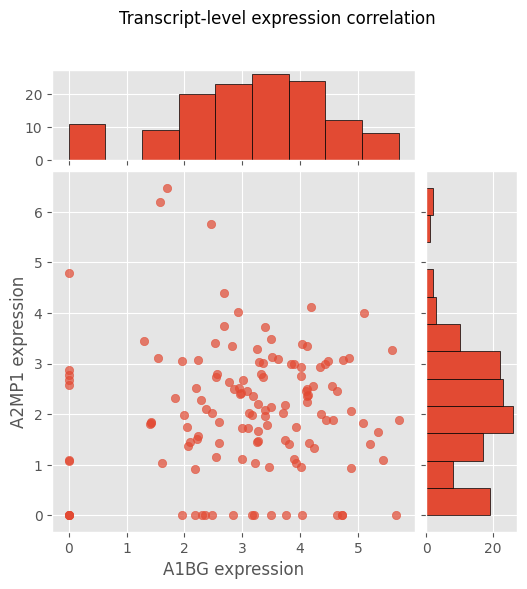

In [28]:
from matplotlib import gridspec

# 1. Grab each transcript column (MultiIndex style: (gene, transcript_ID))
x = transcriptomics.loc[:, ("A1BG", "ENSG00000121410.12")]
y = transcriptomics.loc[:, ("A2MP1",    "ENSG00000256069.7")]

# 2. Keep only the samples that have a value for BOTH transcripts
xy = pd.concat([x, y], axis=1, keys=["A1BG", "A2MP1"]).dropna()

# 3. Figure layout: scatter in the middle, histograms on top & right
fig = plt.figure(figsize=(6, 6))
gs  = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                        wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx   = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy   = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# 4. Scatter plot
ax_scatter.scatter(xy["A1BG"], xy["A2MP1"], alpha=0.7)
ax_scatter.set_xlabel("A1BG expression")
ax_scatter.set_ylabel("A2MP1 expression")

# 5. Histograms (marginals)
ax_histx.hist(xy["A1BG"], bins="auto", edgecolor="black")
ax_histy.hist(xy["A2MP1"], bins="auto", orientation="horizontal",
              edgecolor="black")

# tidy up tick labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

fig.suptitle("Transcript-level expression correlation")
plt.tight_layout()
plt.show()


In [34]:
first_ten_cols = list(transcriptomics.columns)[:10]
first_ten_cols

[('A1BG', 'ENSG00000121410.12'),
 ('A1BG-AS1', 'ENSG00000268895.6'),
 ('A1CF', 'ENSG00000148584.15'),
 ('A2M', 'ENSG00000175899.15'),
 ('A2M-AS1', 'ENSG00000245105.4'),
 ('A2ML1', 'ENSG00000166535.20'),
 ('A2ML1-AS1', 'ENSG00000256661.1'),
 ('A2ML1-AS2', 'ENSG00000256904.1'),
 ('A2MP1', 'ENSG00000256069.7'),
 ('A3GALT2', 'ENSG00000184389.9')]

In [36]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# If you haven't already → pip install ipywidgets ipympl
# and in the notebook do:  %matplotlib widget

# limit to first 10 columns, try changing this number to select different columns
first_ten_cols = list(transcriptomics.columns)[:10]

col_options = []
for col in first_ten_cols:
    if isinstance(col, tuple):
        label = f"{col[0]} | {col[1]}"
    else:
        label = str(col)
    col_options.append((label, col))

x_dropdown = widgets.Dropdown(options=col_options,
                              value=col_options[0][1], description="X:")
y_dropdown = widgets.Dropdown(options=col_options,
                              value=col_options[1][1], description="Y:")

out = widgets.Output()

def series_from_column(col_key):
    s = transcriptomics.loc[:, col_key]
    return s.iloc[:, 0] if isinstance(s, pd.DataFrame) else s

def update_plot(change=None):
    with out:
        clear_output(wait=True)

        x_key, y_key = x_dropdown.value, y_dropdown.value
        x = series_from_column(x_key)
        y = series_from_column(y_key)

        xy = pd.concat([x, y], axis=1, keys=["X", "Y"]).dropna()

        fig = plt.figure(figsize=(6, 6))
        gs  = gridspec.GridSpec(2, 2, width_ratios=[4, 1],
                                height_ratios=[1, 4],
                                wspace=0.05, hspace=0.05)
        ax_s  = fig.add_subplot(gs[1, 0])
        ax_hx = fig.add_subplot(gs[0, 0], sharex=ax_s)
        ax_hy = fig.add_subplot(gs[1, 1], sharey=ax_s)

        ax_s.scatter(xy["X"], xy["Y"], alpha=0.7)
        ax_s.set_xlabel(f"{x_key[0]} • {x_key[1]} expression" if isinstance(x_key, tuple) else str(x_key))
        ax_s.set_ylabel(f"{y_key[0]} • {y_key[1]} expression" if isinstance(y_key, tuple) else str(y_key))

        ax_hx.hist(xy["X"], bins="auto", edgecolor="black")
        ax_hy.hist(xy["Y"], bins="auto", orientation="horizontal", edgecolor="black")
        ax_hx.tick_params(axis="x", labelbottom=False)
        ax_hy.tick_params(axis="y", labelleft=False)

        fig.suptitle("Transcript-level expression correlation")
        plt.tight_layout()
        plt.show()

update_plot()
x_dropdown.observe(update_plot, names="value")
y_dropdown.observe(update_plot, names="value")

display(widgets.HBox([x_dropdown, y_dropdown]))
display(out)


Output()

In [ ]:
## Challenge 4: ##
# Scroll through the different combinations of genes and tell us which are more and less correlated by eye

In [60]:
from IPython.display import display, clear_output

# If you haven't already → pip install ipywidgets ipympl
# and in the notebook do:  %matplotlib widget

# limit to first 10 columns
first_ten_cols = list(transcriptomics.columns)[:10]

col_options = []
for col in first_ten_cols:
    label = f"{col[0]} | {col[1]}" if isinstance(col, tuple) else str(col)
    col_options.append((label, col))

x_dropdown = widgets.Dropdown(options=col_options,
                              value=col_options[0][1], description="X:")
y_dropdown = widgets.Dropdown(options=col_options,
                              value=col_options[1][1], description="Y:")

out = widgets.Output()

def series_from_column(col_key):
    s = transcriptomics.loc[:, col_key]
    return s.iloc[:, 0] if isinstance(s, pd.DataFrame) else s

def update_plot(change=None):
    with out:
        clear_output(wait=True)

        x_key, y_key = x_dropdown.value, y_dropdown.value
        x = series_from_column(x_key)
        y = series_from_column(y_key)

        xy = pd.concat([x, y], axis=1, keys=["X", "Y"]).dropna()

        fig = plt.figure(figsize=(6, 6))
        gs  = gridspec.GridSpec(2, 2, width_ratios=[4, 1],
                                height_ratios=[1, 4],
                                wspace=0.05, hspace=0.05)
        ax_s  = fig.add_subplot(gs[1, 0])
        ax_hx = fig.add_subplot(gs[0, 0], sharex=ax_s)
        ax_hy = fig.add_subplot(gs[1, 1], sharey=ax_s)

        # Scatter
        ax_s.scatter(xy["X"], xy["Y"], alpha=0.7)

        # ---- Line of best fit ----
        if len(xy) > 1 and xy["X"].nunique() > 1:
            slope, intercept = np.polyfit(xy["X"].values, xy["Y"].values, 1)
            x_vals = np.linspace(xy["X"].min(), xy["X"].max(), 200)
            y_fit  = slope * x_vals + intercept
            ax_s.plot(x_vals, y_fit, lw=2, color="crimson")

            r = np.corrcoef(xy["X"], xy["Y"])[0, 1]
            r2 = r**2
            ax_s.text(0.05, 0.95, f"y = {slope:.3g}x + {intercept:.3g}\nR² = {r2:.3f}",
                      transform=ax_s.transAxes, va="top", fontsize=9,
                      bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.6))

        # Labels
        ax_s.set_xlabel(f"{x_key[0]} • {x_key[1]} expression" if isinstance(x_key, tuple) else str(x_key))
        ax_s.set_ylabel(f"{y_key[0]} • {y_key[1]} expression" if isinstance(y_key, tuple) else str(y_key))

        # Marginal histograms
        ax_hx.hist(xy["X"], bins="auto", edgecolor="black")
        ax_hy.hist(xy["Y"], bins="auto", orientation="horizontal", edgecolor="black")
        ax_hx.tick_params(axis="x", labelbottom=False)
        ax_hy.tick_params(axis="y", labelleft=False)

        fig.suptitle("Transcript-level expression correlation")
        plt.tight_layout()
        plt.show()

update_plot()
x_dropdown.observe(update_plot, names="value")
y_dropdown.observe(update_plot, names="value")

display(widgets.HBox([x_dropdown, y_dropdown]))
display(out)


Output()

#Dimensionality Reduction: Principal Component Analysis
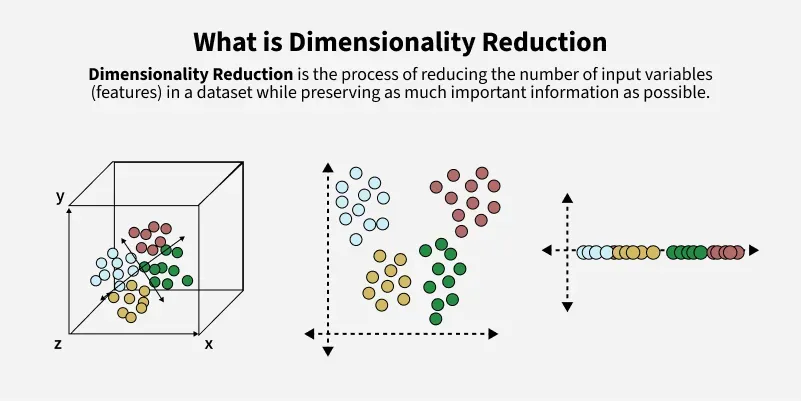
# 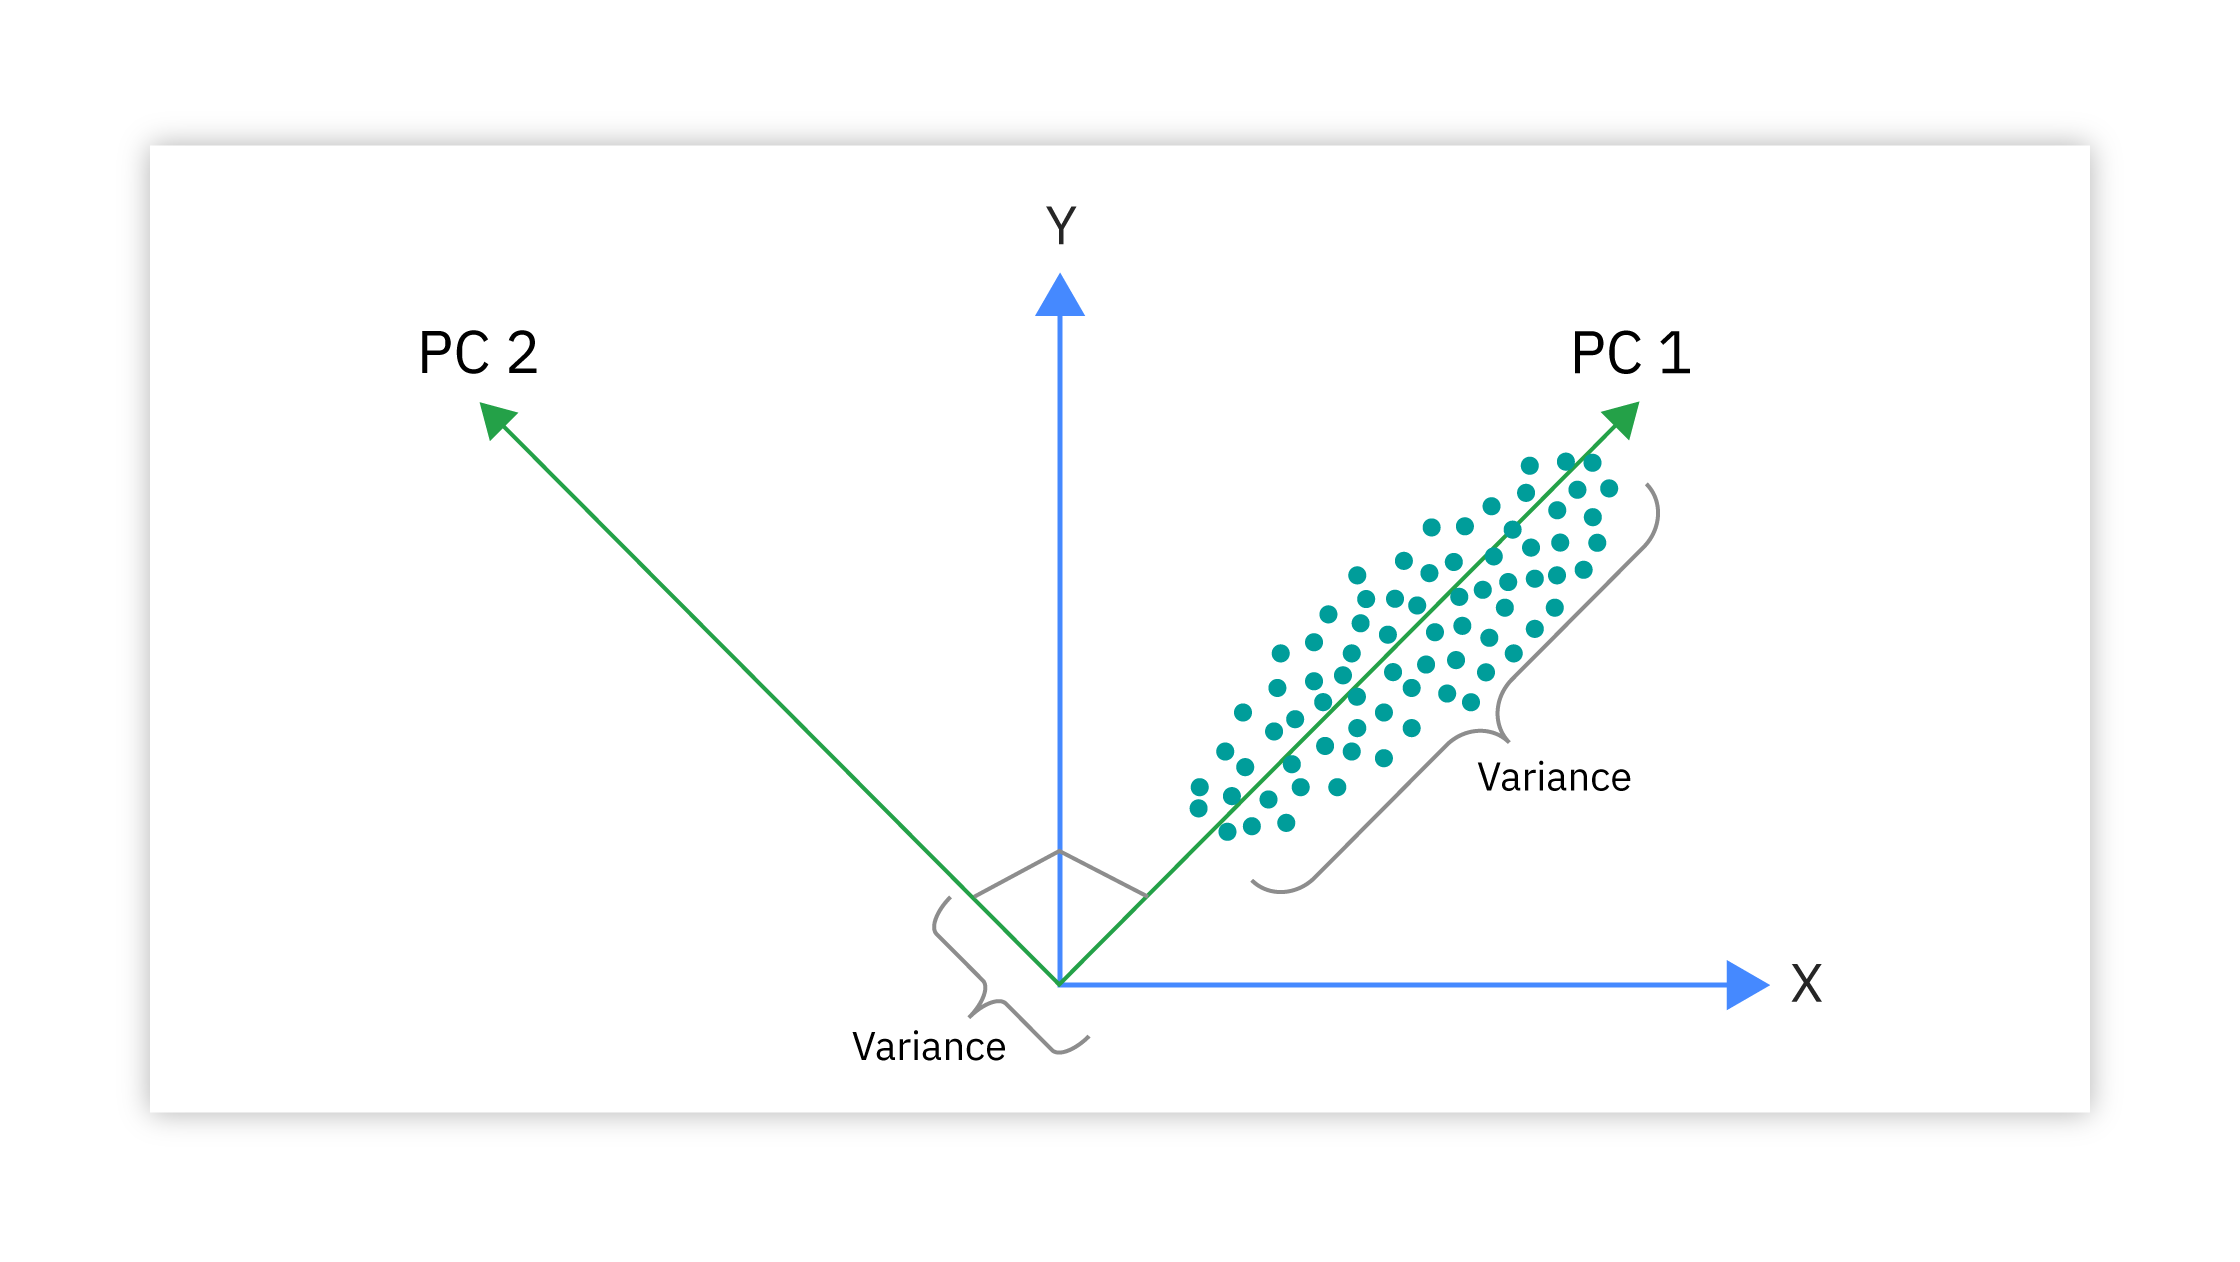

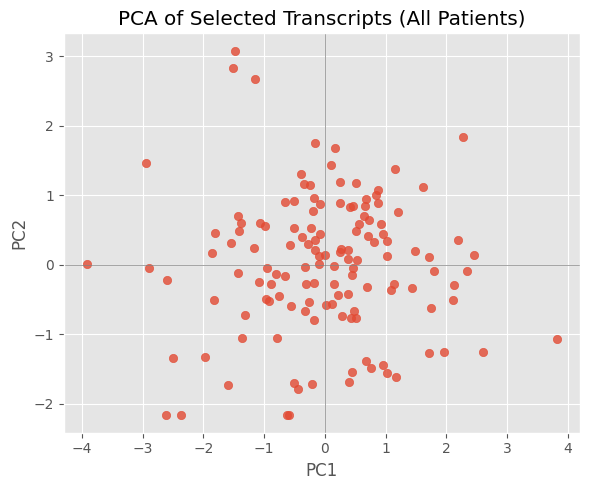

In [71]:
from sklearn.decomposition import PCA
# Recreate the patient subset and transcript list (edit if needed)
patient_ids = transcriptomics.index[:]   # all patients
cols = [
    ("A1BG",     "ENSG00000121410.12"),
    ("A1BG-AS1", "ENSG00000268895.6"),
    ("A2MP1",    "ENSG00000256069.7"),
]

# Helper: always return a 1-D Series for a (gene, transcript) key,
# even if .loc gives a 1-column DataFrame (happens with deeper MultiIndex).
def get_series(col_key):
    col = transcriptomics.loc[:, col_key]
    if isinstance(col, pd.DataFrame):
        # take the first (only) column if a DataFrame appears
        col = col.iloc[:, 0]
    return col

# Build a list of Series (one per transcript), aligned on the same index (patients)
# We'll then assemble into a DataFrame in the *feature* direction and transpose.
feature_series_list = []
for g, t in cols:
    s = get_series((g, t)).reindex(patient_ids)  # ensure same order
    feature_series_list.append(s)

# Stack into a 2-D array: rows = patients, columns = transcripts
# (Each series values become one column after we combine and transpose.)
data = np.column_stack([s.to_numpy(dtype=float) for s in feature_series_list])
# Just in case an extra singleton dimension sneaks in, squeeze it:
data = np.squeeze(data)              # shape now should be (10, 4)

# SAFETY CHECK (optional):
assert data.ndim == 2 and data.shape[0] == len(patient_ids), f"Bad shape: {data.shape}"

# Make nice column labels: "Gene|TranscriptID"
col_labels = [f"{g}|{t}" for g, t in cols]

# 1. Wrap in DataFrame for readability
df = pd.DataFrame(data, index=patient_ids, columns=col_labels)

# 2. Standardize features (mean 0, std 1) so each transcript contributes equally
X = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)

# 3. Fit PCA (all components)
pca = PCA()
scores = pca.fit_transform(X)   # shape: (n_patients, n_components)

# 4. Put first two PCs into a DataFrame
scores_df = pd.DataFrame(scores[:, :2], index=patient_ids, columns=["PC1", "PC2"])

# 5. Loadings (directions of features in PC space)
loadings = pd.DataFrame(
    pca.components_.T,
    index=col_labels,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 7. Scatter plot of samples in PC1 vs PC2
plt.figure(figsize=(6,5))
plt.scatter(scores_df["PC1"], scores_df["PC2"], alpha=0.8)
# for pid in scores_df.index:
#     plt.text(scores_df.loc[pid, "PC1"], scores_df.loc[pid, "PC2"],
#              pid, fontsize=8, ha="center", va="bottom")
plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.title("PCA of Selected Transcripts (All Patients)")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.tight_layout()
plt.show()

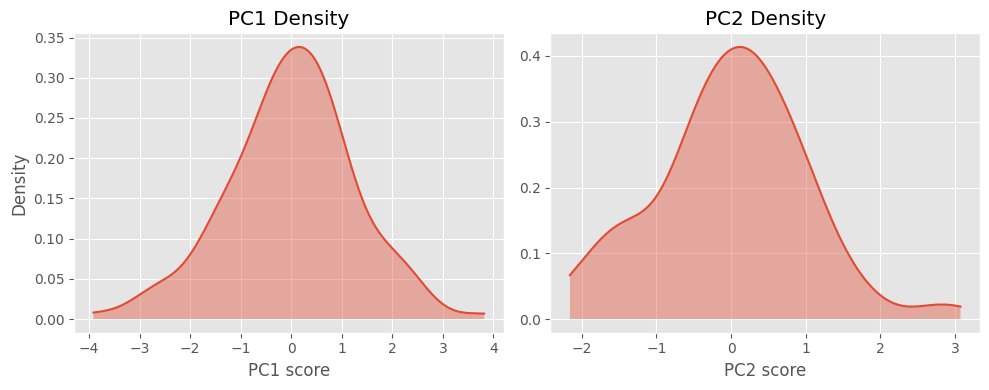

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assume you already have: scores (n_samples × n_components), expl_var (variance ratios)
# If not, be sure you've run PCA and have those variables defined.

pc1 = scores[:, 0]
pc2 = scores[:, 1]

# Build grids over each PC range
grid1 = np.linspace(pc1.min(), pc1.max(), 400)
grid2 = np.linspace(pc2.min(), pc2.max(), 400)

# KDE (Gaussian) fits
kde1 = gaussian_kde(pc1)
kde2 = gaussian_kde(pc2)

dens1 = kde1(grid1)
dens2 = kde2(grid2)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# PC1
axes[0].plot(grid1, dens1)
axes[0].fill_between(grid1, dens1, alpha=0.4)
axes[0].set_title(f"PC1 Density")
axes[0].set_xlabel("PC1 score")
axes[0].set_ylabel("Density")

# PC2
axes[1].plot(grid2, dens2)
axes[1].fill_between(grid2, dens2, alpha=0.4)
axes[1].set_title(f"PC2 Density")
axes[1].set_xlabel("PC2 score")

plt.tight_layout()
plt.show()


In [75]:
## Challenge 5: ##
# Think about how this plot might be similar to a histogram and the previous plots where we had a scatter plot + histogram

[1] PCA: Using first 2 PCs (cumulative variance ≈ 85.1%)
[3] Chosen k = 9 (silhouette = 0.390)


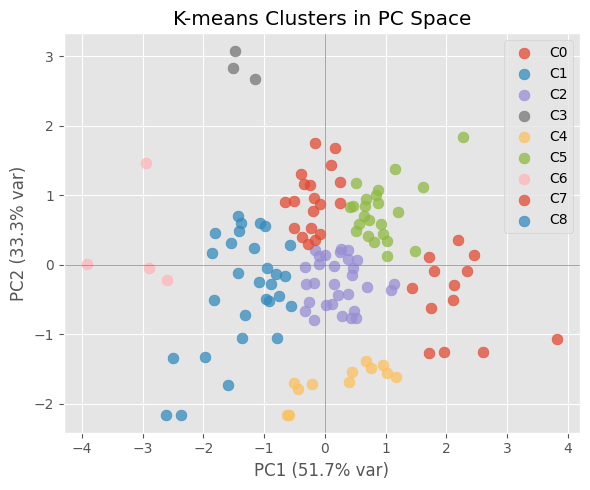

[4] Displayed clustered PC scatter plot.


In [82]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. STANDARDIZE + PCA
X = (df - df.mean()) / df.std(ddof=0)          # standardized matrix (patients × 4)
pca = PCA()
scores = pca.fit_transform(X)                  # shape: (n_patients, <=4 PCs)
expl_var = pca.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

# Keep enough PCs to reach ≥80% cumulative variance (at least 2)
n_pc = max(2, np.searchsorted(cum_var, 0.80) + 1)
X_pcs = scores[:, :n_pc]
print(f"[1] PCA: Using first {n_pc} PCs (cumulative variance ≈ {cum_var[n_pc-1]:.1%})")

# 2. K-MEANS + ELBOW + SILHOUETTE (k selection diagnostics)
# k-means clustering:
  # K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters.
  # It aims to group data points based on similarity, where points within the same cluster are more similar to each other than to those in other clusters.
# elbow:
  # The elbow method in k-means clustering is a visual technique to help determine the optimal number of clusters (k) for a dataset
# silhouette:
  # The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
k_values = range(2, min(10, len(X_pcs)))  # test k=2.. up to ≤9 or n_samples-1
inertias = []
sil_scores = []
for k in k_values:
    km = KMeans(n_clusters=k, n_init=25, random_state=42)
    tmp_labels = km.fit_predict(X_pcs)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pcs, tmp_labels))

# ------------------------------------------------------------
# 3. CHOOSE k (highest silhouette score)
best_k = list(k_values)[int(np.argmax(sil_scores))]
print(f"[3] Chosen k = {best_k} (silhouette = {max(sil_scores):.3f})")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
cluster_labels = kmeans.fit_predict(X_pcs)

# ------------------------------------------------------------
# 4. PC1 vs PC2 SCATTER (colored by cluster)
plt.figure(figsize=(6, 5))
for c in np.unique(cluster_labels):
    mask = cluster_labels == c
    plt.scatter(scores[mask, 0], scores[mask, 1], s=60, alpha=0.75, label=f"C{c}")
plt.xlabel(f"PC1 ({expl_var[0]:.1%} var)")
plt.ylabel(f"PC2 ({expl_var[1]:.1%} var)")
plt.title("K-means Clusters in PC Space")
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()
print("[4] Displayed clustered PC scatter plot.")

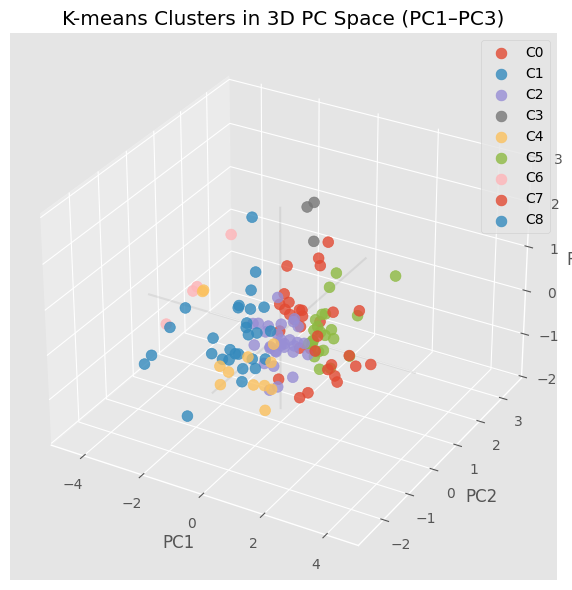

[4-3D] Displayed clustered 3D PC scatter plot.


In [83]:
# --- 3D PC1–PC2–PC3 scatter colored by cluster ---------------------------
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

if scores.shape[1] < 3:
    raise ValueError("PC3 not available: rerun PCA keeping at least 3 components.")

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

for c in np.unique(cluster_labels):
    mask = cluster_labels == c
    ax.scatter(
        scores[mask, 0],   # PC1
        scores[mask, 1],   # PC2
        scores[mask, 2],   # PC3
        s=60, alpha=0.8, label=f"C{c}"
    )

ax.set_xlabel(f"PC1")
ax.set_ylabel(f"PC2")
ax.set_zlabel(f"PC3")
ax.set_title("K-means Clusters in 3D PC Space (PC1–PC3)")

# Optional: light reference planes at 0
ax.plot([0,0],[0,0],[ax.get_zlim()[0], ax.get_zlim()[1]], color='gray', alpha=0.15)
ax.plot([0,0],[ax.get_ylim()[0], ax.get_ylim()[1]],[0,0], color='gray', alpha=0.15)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]],[0,0],[0,0], color='gray', alpha=0.15)

ax.legend()
plt.tight_layout()
plt.show()
print("[4-3D] Displayed clustered 3D PC scatter plot.")